$\large\textbf{Exercise 2.}$\
The given function is: $q(x) = \sqrt{x_{1}^2 +4} + \sqrt{x_{2}^2 +4}$

1. **Minimizer and Minimum Function Value:**
   - The minimizer is obtained by finding where the partial derivatives exist.
   - The function is not differentiable at points where the square roots are equal to zero.
   - The minimizer occurs when both square roots are equal to zero: $ x_1 = 0 $ and $ x_2 = 0 $.
   - The minimum function value is found by plugging in these values into $ q(x) $:
     q(0, 0) =  4
2. **Uniqueness of Minimizer:**
   - Similar to the previous case, the minimizer is unique at $ (0, 0) $.

3. **Local or Global Minima:**
   - As the function is defined for all real values of $ x_1 $ and $ x_2 $, and the minimizer $ (0, 0) $ results in the minimum function value, it is a global minimum.

4. **Convexity of the Function:**
   - The square root function is convex on its domain. Since $ q(x) $ is a composition of convex functions (sum of square roots), it is also convex on its domain.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
def evalf(x):
  return (np.sqrt((x[0]**2)+4)+np.sqrt((x[1]**2)+4))

In [3]:
def evalg(x):
  return np.array([(x[0])/(np.sqrt((x[0]**2)+4)),  (x[1])/(np.sqrt((x[1]**2)+4))])

In [4]:
def evalh(x):
  return np.array([[ 4/((np.sqrt((x[0]**2)+4))*((x[0]**2)+4)), 0], [0, 4/((np.sqrt((x[1]**2)+4))*((x[1]**2)+4))]])

In [5]:
def compute_D_k(x):
  hess = evalh(x)
  return np.linalg.inv(hess)

 Since the eigen values of the hessian will always be equal(diagonal elements of the diagonal hessian matrix).

In [6]:
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma):
  alpha = alpha_start
  p = -gradf
  while evalf(x + alpha*p) > (evalf(x)-(gamma*alpha*np.dot(p,p))):
    alpha = rho*alpha
  return alpha

In [7]:
def compute_steplength_backtracking_scaled_direction(x,gradf,alpha_start, rho, gamma):
  alpha = alpha_start
  p = -gradf
  D_k = compute_D_k(x)
  m = np.matmul(D_k,p)
  while evalf(x)<evalf(x+alpha*m)+(np.matmul(np.matrix.transpose(gradf), m))*alpha*gamma:
    alpha = alpha*rho
  return alpha


In [8]:
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [9]:
def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  x = start_x
  g_x = evalg(x)
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  k = 0
  while (np.linalg.norm(g_x) > tol):
    D_k = compute_D_k(x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x, alpha_start, rho, gamma)
    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 1.0
    else:
      raise ValueError('Line search type unknown. Please check!')

    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x)))
    k += 1
    g_x = evalg(x)
    print("Iter:",k,"X: ",x)
  return x , evalf(x), k

$\large\textbf{Exercise 2.2}$

I. **Constant Step Length**

In [10]:
my_start_x = np.array([2.0, 2.0])
my_tol= 1e-9

opt_x, opt_f, iter = find_minimizer_gdscaling(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print("Minimizer:",opt_x)
print("Minimum value:",opt_f)
print("Num of iterations:",iter)

Streaming output truncated to the last 5000 lines.
Iter: 13247 X:  [-2. -2.]
Iter: 13248 X:  [2. 2.]
Iter: 13249 X:  [-2. -2.]
Iter: 13250 X:  [2. 2.]
Iter: 13251 X:  [-2. -2.]
Iter: 13252 X:  [2. 2.]
Iter: 13253 X:  [-2. -2.]
Iter: 13254 X:  [2. 2.]
Iter: 13255 X:  [-2. -2.]
Iter: 13256 X:  [2. 2.]
Iter: 13257 X:  [-2. -2.]
Iter: 13258 X:  [2. 2.]
Iter: 13259 X:  [-2. -2.]
Iter: 13260 X:  [2. 2.]
Iter: 13261 X:  [-2. -2.]
Iter: 13262 X:  [2. 2.]
Iter: 13263 X:  [-2. -2.]
Iter: 13264 X:  [2. 2.]
Iter: 13265 X:  [-2. -2.]
Iter: 13266 X:  [2. 2.]
Iter: 13267 X:  [-2. -2.]
Iter: 13268 X:  [2. 2.]
Iter: 13269 X:  [-2. -2.]
Iter: 13270 X:  [2. 2.]
Iter: 13271 X:  [-2. -2.]
Iter: 13272 X:  [2. 2.]
Iter: 13273 X:  [-2. -2.]
Iter: 13274 X:  [2. 2.]
Iter: 13275 X:  [-2. -2.]
Iter: 13276 X:  [2. 2.]
Iter: 13277 X:  [-2. -2.]
Iter: 13278 X:  [2. 2.]
Iter: 13279 X:  [-2. -2.]
Iter: 13280 X:  [2. 2.]
Iter: 13281 X:  [-2. -2.]
Iter: 13282 X:  [2. 2.]
Iter: 13283 X:  [-2. -2.]
Iter: 13284 X:  [2. 2.]

KeyboardInterrupt: 

It keeps oscillating between (-2,-2) and (2,2). As the step size is not good for using the gradient descent method. Thus I stopped the code.


II. **Backtracking line search**

In [11]:
alpha_start = 1.0
rho = 0.5
gamma = 0.5
opt_x, opt_f, iter= find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start, rho, gamma )
print("Minimizer:",opt_x)
print("Minimum value:",opt_f)
print("Num of iterations:",iter)

Streaming output truncated to the last 5000 lines.
Iter: 5532 X:  [2. 2.]
Iter: 5533 X:  [-2. -2.]
Iter: 5534 X:  [2. 2.]
Iter: 5535 X:  [-2. -2.]
Iter: 5536 X:  [2. 2.]
Iter: 5537 X:  [-2. -2.]
Iter: 5538 X:  [2. 2.]
Iter: 5539 X:  [-2. -2.]
Iter: 5540 X:  [2. 2.]
Iter: 5541 X:  [-2. -2.]
Iter: 5542 X:  [2. 2.]
Iter: 5543 X:  [-2. -2.]
Iter: 5544 X:  [2. 2.]
Iter: 5545 X:  [-2. -2.]
Iter: 5546 X:  [2. 2.]
Iter: 5547 X:  [-2. -2.]
Iter: 5548 X:  [2. 2.]
Iter: 5549 X:  [-2. -2.]
Iter: 5550 X:  [2. 2.]
Iter: 5551 X:  [-2. -2.]
Iter: 5552 X:  [2. 2.]
Iter: 5553 X:  [-2. -2.]
Iter: 5554 X:  [2. 2.]
Iter: 5555 X:  [-2. -2.]
Iter: 5556 X:  [2. 2.]
Iter: 5557 X:  [-2. -2.]
Iter: 5558 X:  [2. 2.]
Iter: 5559 X:  [-2. -2.]
Iter: 5560 X:  [2. 2.]
Iter: 5561 X:  [-2. -2.]
Iter: 5562 X:  [2. 2.]
Iter: 5563 X:  [-2. -2.]
Iter: 5564 X:  [2. 2.]
Iter: 5565 X:  [-2. -2.]
Iter: 5566 X:  [2. 2.]
Iter: 5567 X:  [-2. -2.]
Iter: 5568 X:  [2. 2.]
Iter: 5569 X:  [-2. -2.]
Iter: 5570 X:  [2. 2.]
Iter: 5571 X: 

KeyboardInterrupt: 

##Observation

The minimizer keeps changing from (2,2) to (-2,-2) and vice versa . So, it goes upto infinity iterations. hence I stopped it.

<ipython-input-12-00c95bec48cc>:67: UserWarning: The following kwargs were not used by contour: 'label'
  axs[0].contour(X, Y, Z, levels=20, cmap='viridis', label='Level Sets')
<ipython-input-12-00c95bec48cc>:75: UserWarning: The following kwargs were not used by contour: 'label'
  axs[1].contour(X, Y, Z, levels=20, cmap='viridis', label='Level Sets')


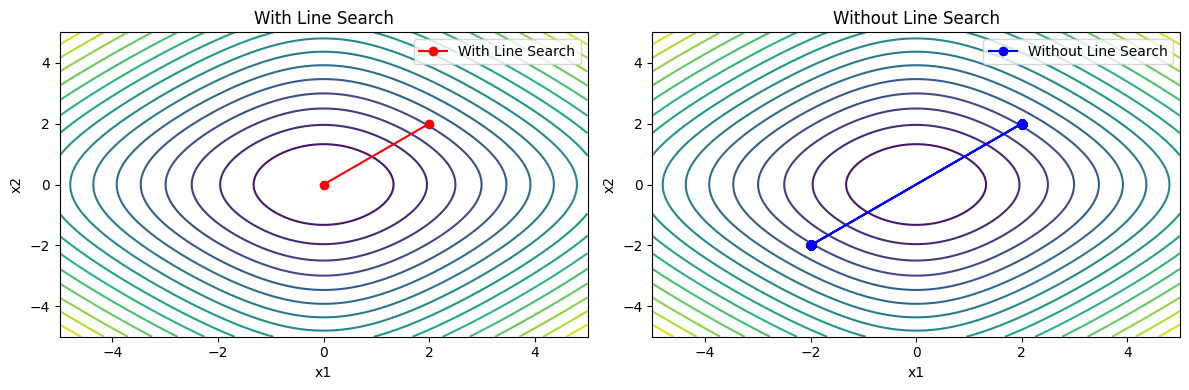

In [12]:
def q(x):
    return np.sqrt(x[0]**2 + 4) + np.sqrt(x[1]**2 + 4)

def gradient_q(x):
    return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])

def hessian_q(x):
    return np.array([
        [4 / (x[0]**2 + 4)**1.5, 0],
        [0, 4 / (x[1]**2 + 4)**1.5]
    ])

def backtracking_line_search(x, gradient, direction, alpha_start, rho, gamma):
    alpha = alpha_start
    while q(x - alpha * np.linalg.inv(hessian_q(x)).dot(gradient)) > q(x) + gamma * alpha * gradient.dot(direction):
        alpha *= rho
    return alpha

def newtons_method_with_line_search(start_x, tol, line_search_function, *line_search_params):
    x = start_x
    trajectory = [x.copy()]
    iteration = 0
    while np.linalg.norm(gradient_q(x)) > tol:
        direction = -np.linalg.inv(hessian_q(x)).dot(gradient_q(x))
        step_size = line_search_function(x, gradient_q(x), direction, *line_search_params)
        x = x + step_size * direction
        trajectory.append(x.copy())
        iteration += 1
    return np.array(trajectory)

def newtons_method_without_line_search(start_x, tol, max_iter):
    x = start_x
    trajectory = [x.copy()]
    iteration = 0
    while iteration < max_iter:
        direction = -np.linalg.inv(hessian_q(x)).dot(gradient_q(x))
        x = x + direction
        trajectory.append(x.copy())
        iteration += 1
        if np.linalg.norm(direction) < tol:
            break
    return np.array(trajectory)

# Set parameters
my_start_x = np.array([2.0, 2.0])
my_tol = 1e-9
alpha_start = 1.0
rho = 0.5
gamma = 0.5
max_iter_without_line_search = 1000

# Run Newton's method with and without line search
trajectory_with_line_search = newtons_method_with_line_search(my_start_x, my_tol, backtracking_line_search, alpha_start, rho, gamma)
trajectory_without_line_search = newtons_method_without_line_search(my_start_x, my_tol, max_iter_without_line_search)

# Generate points for level set plot
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.sqrt(X**2 + 4) + np.sqrt(Y**2 + 4)


# Create two separate plots for with and without line search
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot for trajectory with line search
axs[0].contour(X, Y, Z, levels=20, cmap='viridis', label='Level Sets')
axs[0].plot(trajectory_with_line_search[:, 0], trajectory_with_line_search[:, 1], 'ro-', label='With Line Search')
axs[0].set_title('With Line Search')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].legend()

# Plot for trajectory without line search
axs[1].contour(X, Y, Z, levels=20, cmap='viridis', label='Level Sets')
axs[1].plot(trajectory_without_line_search[:, 0], trajectory_without_line_search[:, 1], 'bo-', label='Without Line Search')
axs[1].set_title('Without Line Search')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


$\large\textbf{Exercise 2.3}$

I. **Backtracking Line Search (without scaling)**

In [13]:
def find_minimizer(start_x, tol, line_search_type,*args):
  x = start_x
  g_x = evalg(x)
  gradf = evalg(x)

  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k = 0

  while (np.linalg.norm(g_x) > tol):
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,gradf, alpha_start,rho, gamma)
    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 1.0
    else:
      raise ValueError('Line search type unknown. Please check!')

    x = np.subtract(x, np.multiply(step_length,g_x))
    k += 1
    g_x = evalg(x)
    gradf = evalg(x)
  return x ,evalf(x),k

In [14]:
alpha_start = 1.0
rho = 0.5
gamma = 0.5
opt_x, opt_f, iter = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start, rho, gamma )
print("Minimizer:",opt_x)
print("Minimum value:",opt_f)
print("Num of iterations:",iter)

Minimizer: [7.62525638e-10 7.62525638e-10]
Minimum value: 4.0
Num of iterations: 32


For Constant Step Length:


In [15]:
alpha_start = 1.0
rho = 0.5
gamma = 0.5
opt_x, opt_f, iter = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH )
print("Minimizer:",opt_x)
print("Minimum value:",opt_f)
print("Num of iterations:",iter)

Minimizer: [7.62525638e-10 7.62525638e-10]
Minimum value: 4.0
Num of iterations: 32


We get the same solution with same number of iterations using both the methods.

$\large\textbf{Exercise 2.4}$

I. **Constant step-length**

In [16]:
my_start_x = np.array([16.0,16.0])

In [17]:
def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  x = start_x
  g_x = evalg(x)
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  k = 0
  while (np.linalg.norm(g_x) > tol):
    D_k = compute_D_k(x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x, alpha_start, rho, gamma)
    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 1
    else:
      raise ValueError('Line search type unknown. Please check!')
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x)))
    k += 1
    g_x = evalg(x)
  return x , evalf(x), k

In [18]:
my_start_x = np.array([16.0, 16.0])
my_tol= 1e-9

opt_x, opt_f, iter = find_minimizer_gdscaling(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print("Minimizer:",opt_x)
print("Minimum value:",opt_f)
print("Num of iterations:",iter)

Minimizer: [-5.64802792e+219 -5.64802792e+219]
Minimum value: inf
Num of iterations: 5


<ipython-input-3-b577098c7d74>:2: RuntimeWarning: overflow encountered in double_scalars
  return np.array([(x[0])/(np.sqrt((x[0]**2)+4)),  (x[1])/(np.sqrt((x[1]**2)+4))])


In [19]:
def compute_D_k(x):
  hess = evalh(x)
  return np.linalg.inv(hess)

alpha_start = 1.0
rho = 0.5
gamma = 0.5
opt_x, opt_f, iter = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start, rho, gamma )
print("Minimizer:",opt_x)
print("Minimum value:",opt_f)
print("Num of iterations:",iter)

<ipython-input-2-e485b1878822>:2: RuntimeWarning: overflow encountered in double_scalars
  return (np.sqrt((x[0]**2)+4)+np.sqrt((x[1]**2)+4))


LinAlgError: Singular matrix

In both the above methods, we got an error of singular matrix. which indicates that these method are not applicable for this function for the given starting point. we awill now try this without scaling.

<ipython-input-20-50c2f47bccf9>:9: RuntimeWarning: overflow encountered in double_scalars
  return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])
<ipython-input-20-50c2f47bccf9>:47: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, levels=20, cmap='viridis', label='Level Sets')


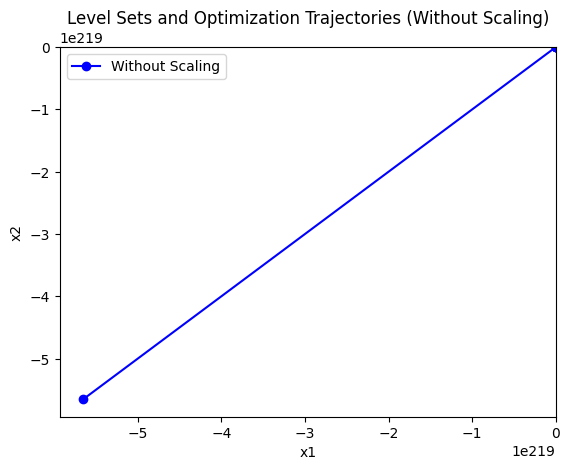

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition
def q(x):
    return np.sqrt(x[0]**2 + 4) + np.sqrt(x[1]**2 + 4)

def gradient_q(x):
    return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])

def hessian_q(x):
    return np.array([
        [4 / (x[0]**2 + 4)**1.5, 0],
        [0, 4 / (x[1]**2 + 4)**1.5]
    ])

# Newton's method without scaling
def newtons_method_without_scaling(start_x, tol):
    x = start_x
    trajectory = [x.copy()]
    iteration = 0
    while np.linalg.norm(gradient_q(x)) > tol:
        try:
            direction = -np.linalg.inv(hessian_q(x)).dot(gradient_q(x))
            x = x + direction
        except np.linalg.LinAlgError:
            # Handle the case of a singular matrix
            break
        trajectory.append(x.copy())
        iteration += 1
    return np.array(trajectory)

# Set parameters
my_start_x = np.array([16.0, 16.0])
my_tol = 1e-9

# Run Newton's method without scaling
trajectory_without_scaling = newtons_method_without_scaling(my_start_x, my_tol)

# Generate points for level set plot
x_range = np.linspace(-5, 20, 100)
y_range = np.linspace(-5, 20, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.sqrt(X**2 + 4) + np.sqrt(Y**2 + 4)

# Plot level sets
plt.contour(X, Y, Z, levels=20, cmap='viridis', label='Level Sets')

# Plot trajectory without scaling
plt.plot(trajectory_without_scaling[:, 0], trajectory_without_scaling[:, 1], 'bo-', label='Without Scaling')

# Set labels and legend
plt.title('Level Sets and Optimization Trajectories (Without Scaling)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

# Show the plot
plt.show()

$\large\textbf{Exercise 2.5}$

**Backtracking line search(without scaling)**

In [21]:
alpha_start = 1.0
rho = 0.5
gamma = 0.5
opt_x, opt_f, iter= find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start, rho, gamma )
print("Minimizer:",opt_x)
print("Minimum value:",opt_f)
print("Num of iterations:",iter)

Minimizer: [1.19947822e-09 1.19947822e-09]
Minimum value: 4.0
Num of iterations: 46


COnstant Step Length (without scaling):

In [22]:
opt_x, opt_f, iter= find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH )
print("Minimizer:",opt_x)
print("Minimum value:",opt_f)
print("Num of iterations:",iter)

Minimizer: [1.19947822e-09 1.19947822e-09]
Minimum value: 4.0
Num of iterations: 46


Without scaling, we get the minimum of function in 38 and 39 iterations respectively. which indicates that this method are applicable to this starting point. The minimum values got are also almost same.